# Continuous Glucose Monitoring Data Analysis Using *glucoCheck* Package

To begin with you will have to check if **python** and all the relevant packages are installed on your machine.
Detailed list, including how to install, can be accessed from the documentation page : https://snehg0205.github.io/index.html#chp1

The *glucoCheck* package can be downloaded from: XXXXXXXXXXXXXXXXXXXXXX, which will have to be explicitly imported.
Below we will be using publically available dataset from Hall et al. paper ( https://doi.org/10.1371/journal.pbio.2005143 ). Continuous glucose monitoring (CGM) data consists of 105426 glucose reading taken every 5min across 57 individuals, for convenience this data is readily available as part of the *glucoCheck* package. Otherwise you can load your data directly from your machine.

In [1]:
from GlucoCheck.glucoCheck import glucoCheckOps

glucoCheckObject = glucoCheckOps()

Using TensorFlow backend.


### Reading-in data
The following command illustrates how to extract the Hall dataset from the package

In [2]:
import pandas as pd
data = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/Data/Hall/data_hall_raw.csv")
data.head()

,subjectId,Display Time,GlucoseValue
0,1636-69-001,2/3/14 03:42,93
1,1636-69-001,2/3/14 03:47,93
2,1636-69-001,2/3/14 03:52,93
3,1636-69-001,2/3/14 03:57,95
4,1636-69-001,2/3/14 04:02,96


##### To see all the unique subject IDs of the individuals in our data, use the following command:

In [3]:
print(data.subjectId.unique())

['1636-69-001' '1636-69-026' '1636-69-028' '1636-69-032' '1636-69-035'
 '1636-69-048' '1636-69-053' '1636-69-060' '1636-69-064' '1636-69-069'
 '1636-69-090' '1636-69-091' '1636-69-100' '1636-69-104' '1636-69-107'
 '1636-69-111' '1636-69-114' '1636-69-123' '1636-70-1002' '1636-70-1003'
 '1636-70-1005' '1636-70-1008' '1636-70-1010' '2133-001' '2133-002'
 '2133-003' '2133-004' '2133-006' '2133-007' '2133-008' '2133-009'
 '2133-010' '2133-011' '2133-012' '2133-013' '2133-015' '2133-017'
 '2133-018' '2133-019' '2133-020' '2133-021' '2133-022' '2133-023'
 '2133-024' '2133-025' '2133-026' '2133-027' '2133-028' '2133-030'
 '2133-032' '2133-033' '2133-035' '2133-036' '2133-037' '2133-039'
 '2133-040' '2133-041']


##### To visualize any of the above individuals, set the subject ID in the quotes below

Displaying for all days 


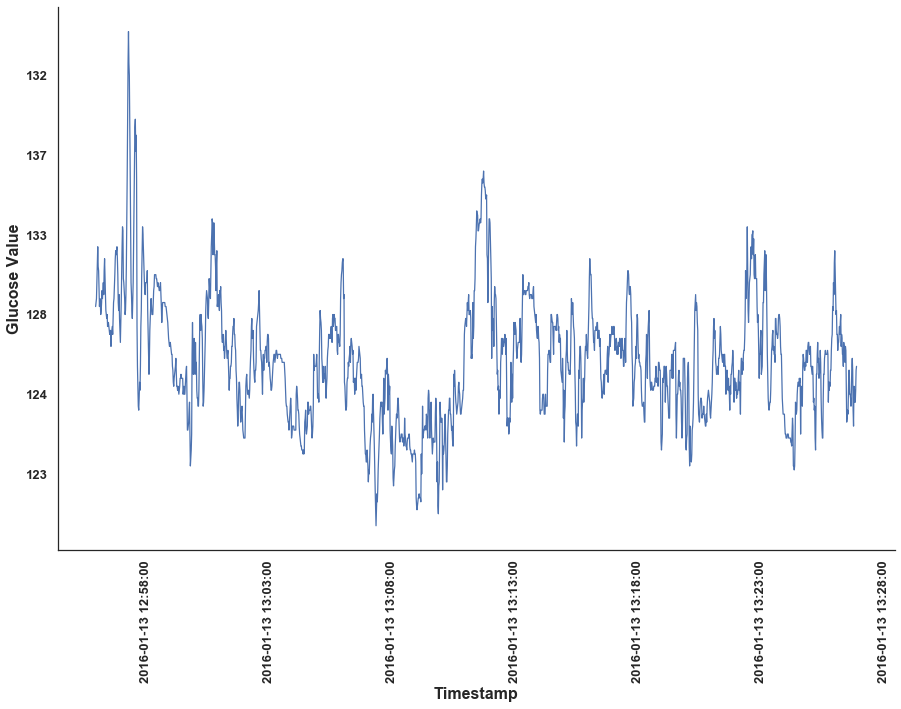

In [4]:
glucoCheckObject.plotIndividual('1636-69-032',data)

### Initial data inspection and visualisation
To understand the overall data quality we need to inspect the data, this will help with data quality control. By typing the following comand we will get the table with few measures of data "goodness":

In [5]:
xx = glucoCheckObject.dataDescribe(data)
# view the first 5 rows (individuals) of the data description
xx.head(5)

,Subject ID,Start,End,# of readings,Max. Glucose Value,# of Days,Timestamp Days,# of Missing Values,Percent of missing values,Average gap size,Min. Glucose Value,Mean Glucose Value
0,2133-041,2017-07-03 18:32:00,2017-07-11 20:41:00,1858,204,8.08,8 days 02:04:00,490,21.04,28.823529,51,108.560
1,2133-040,2017-06-28 13:34:00,2017-07-05 00:19:00,1792,171,6.42,6 days 10:40:00,100,5.39,2.941176,59,92.585
2,2133-039,2017-06-05 12:23:00,2017-06-14 13:57:00,2013,204,9.04,9 days 01:29:00,733,28.09,5.511278,50,103.922
3,2133-037,2017-06-05 14:11:00,2017-06-11 21:50:00,1785,153,6.29,6 days 07:34:00,57,3.13,2.714286,48,92.966
4,2133-036,2017-06-01 15:26:00,2017-06-10 06:31:00,1954,214,8.62,8 days 15:00:00,651,26.21,5.470588,58,107.529


In [6]:
# to sort the data description table by any column, set the column name in the quotes below
xx.sort_values('Percent of missing values')

,Subject ID,Start,End,# of readings,Max. Glucose Value,# of Days,Timestamp Days,# of Missing Values,Percent of missing values,Average gap size,Min. Glucose Value,Mean Glucose Value
53,1636-69-032,2016-01-13 12:58:00,2016-01-19 17:32:00,1783,191,6.17,6 days 04:29:00,3,0.17,1.500000,67,108.316
11,2133-026,2017-04-19 14:10:00,2017-04-25 18:49:00,1782,166,6.17,6 days 04:34:00,6,0.34,2.000000,45,82.692
26,2133-009,2016-11-21 13:33:00,2016-11-27 18:08:00,1781,183,6.17,6 days 04:30:00,6,0.34,2.000000,59,109.652
7,2133-032,2017-05-19 13:31:00,2017-05-25 18:05:00,1781,147,6.17,6 days 04:29:00,8,0.45,1.600000,69,99.475
51,1636-69-048,2015-11-26 00:36:00,2015-12-02 05:10:00,1779,144,6.17,6 days 04:29:00,10,0.56,2.000000,63,97.013
31,2133-003,2016-09-02 17:51:00,2016-09-09 00:56:00,1805,190,6.29,6 days 07:00:00,12,0.66,4.000000,62,100.043
29,2133-006,2016-11-01 00:00:00,2016-11-07 04:30:00,1777,148,6.17,6 days 04:25:00,12,0.67,2.000000,54,83.616
30,2133-004,2016-09-21 00:04:00,2016-09-27 04:33:00,1776,246,6.17,6 days 04:24:00,17,0.95,1.888889,61,126.619
27,2133-008,2016-11-22 00:03:00,2016-11-28 07:37:00,1805,137,6.29,6 days 07:29:00,19,1.05,4.750000,49,89.348
19,2133-018,2017-03-14 13:30:00,2017-03-20 18:09:00,1775,303,6.17,6 days 04:34:00,22,1.23,2.000000,73,126.567


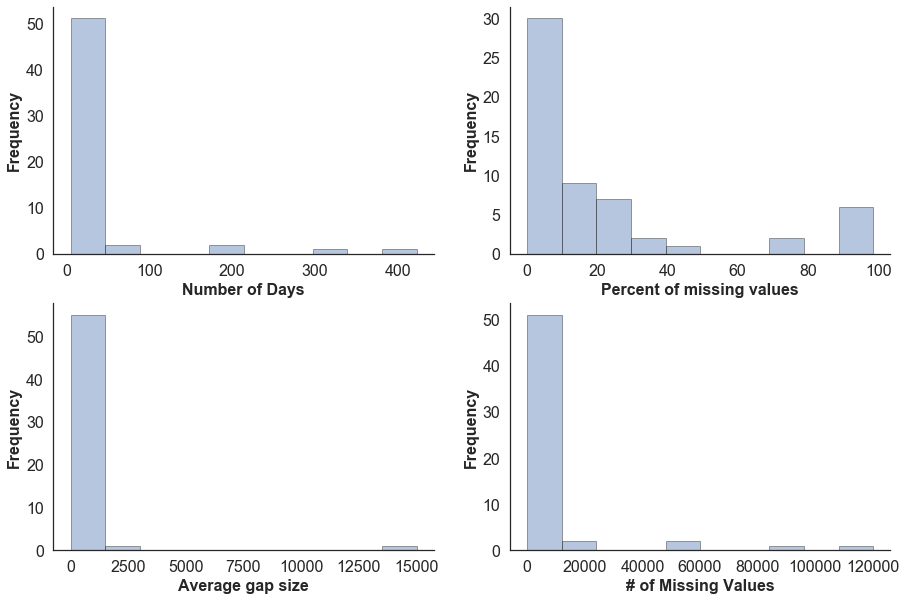

In [7]:
# view collective histograms
glucoCheckObject.histograms(xx)

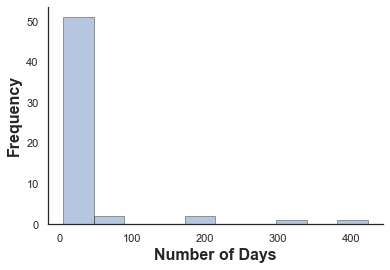

In [8]:
glucoCheckObject.histograms(xx, 'Number of Days')

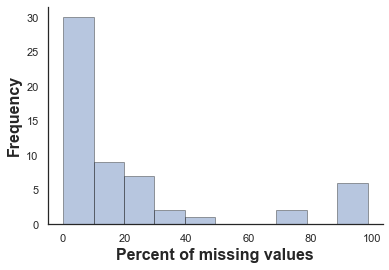

In [9]:
glucoCheckObject.histograms(xx, 'Percent of missing values')

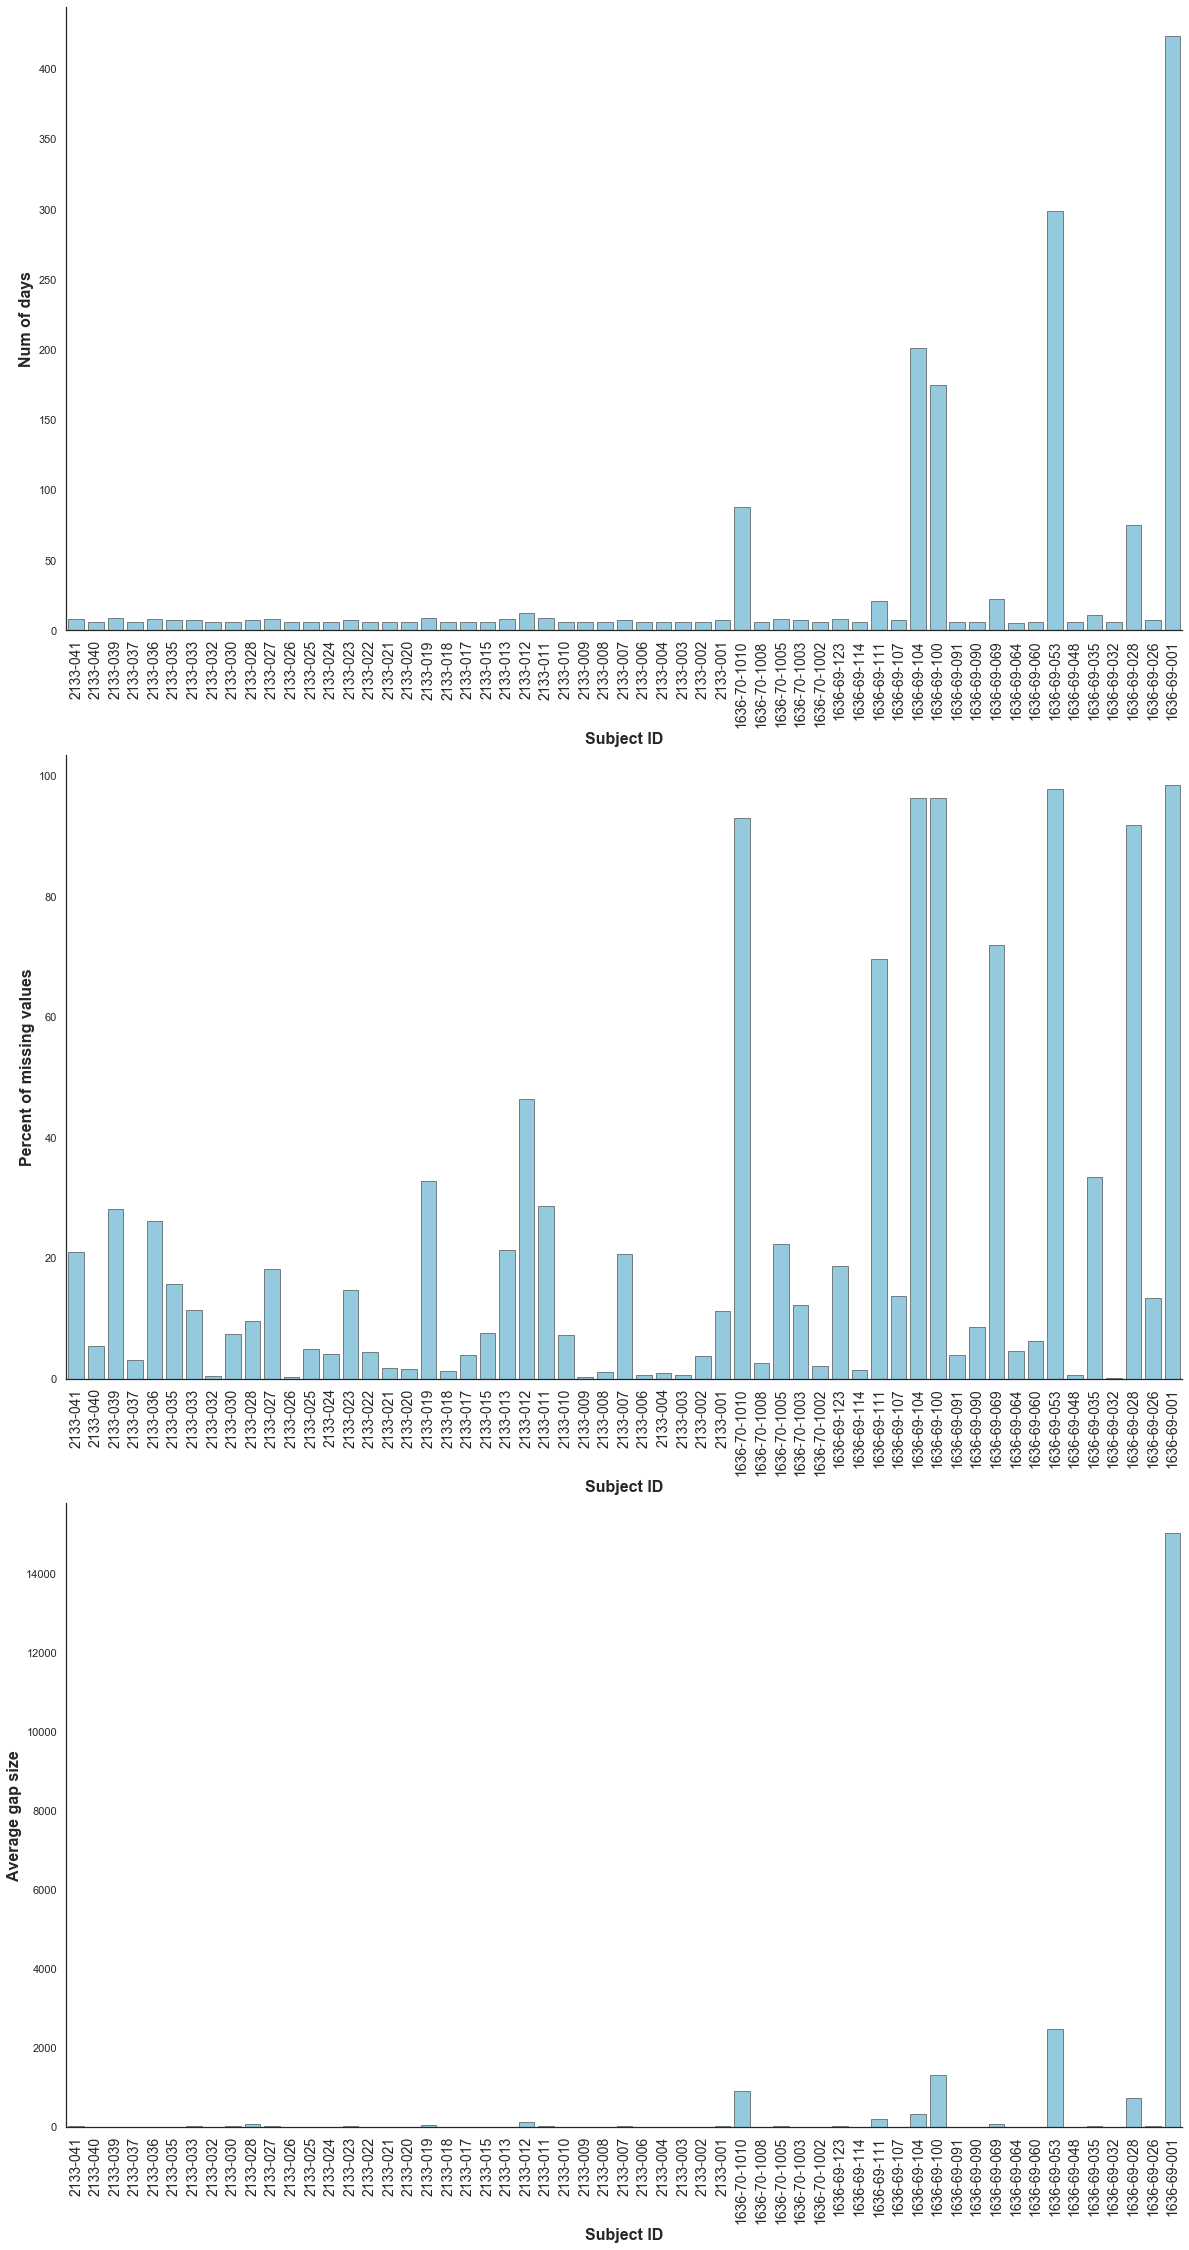

In [10]:
# view collective barplots
glucoCheckObject.barplots(xx)

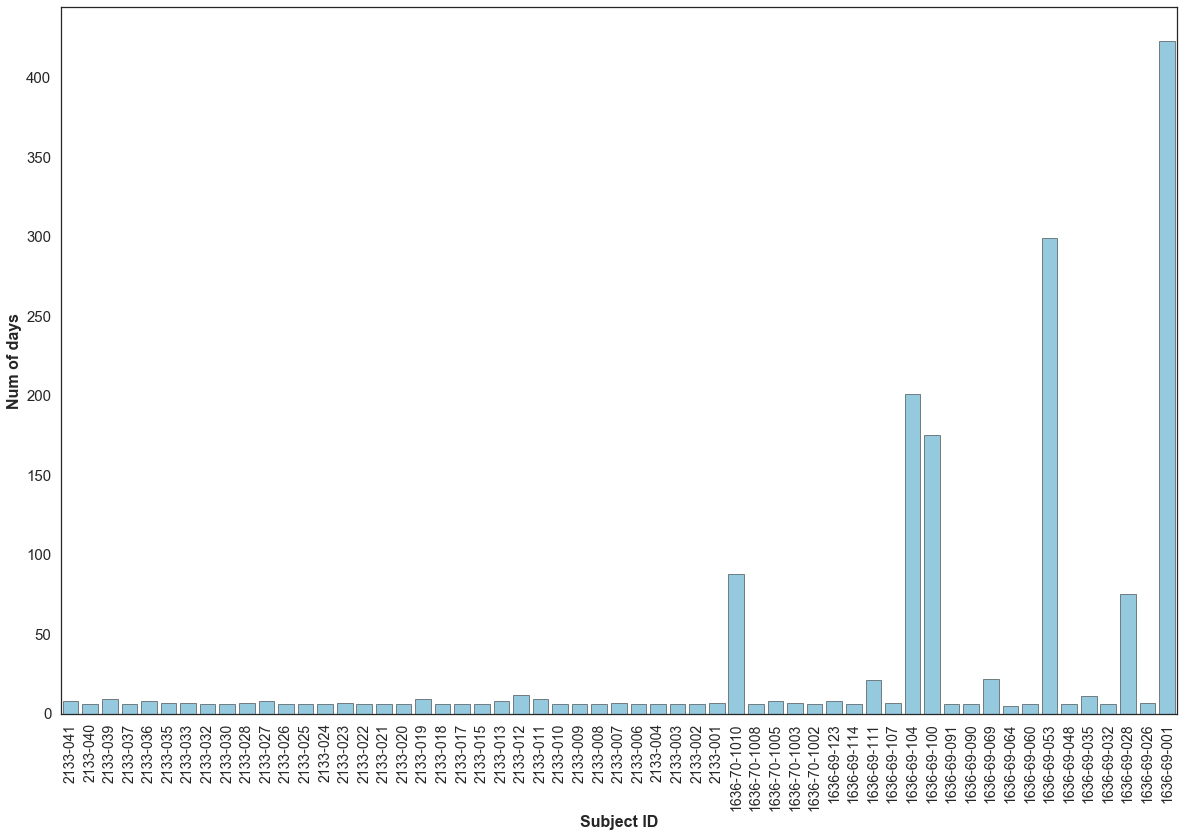

In [11]:
glucoCheckObject.barplots(xx, 'Number of Days')

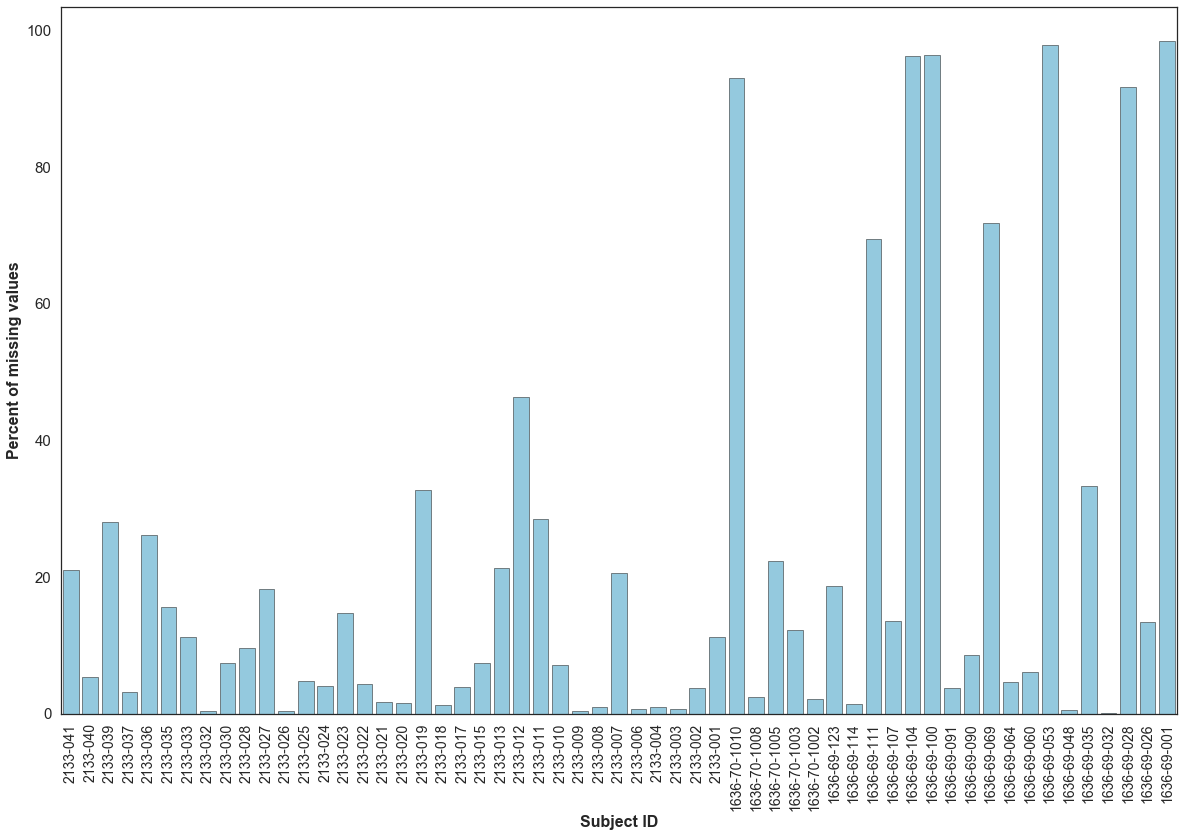

In [12]:
glucoCheckObject.barplots(xx, 'Percent of missing values')

##### To view the data in an individual column, set the column name below

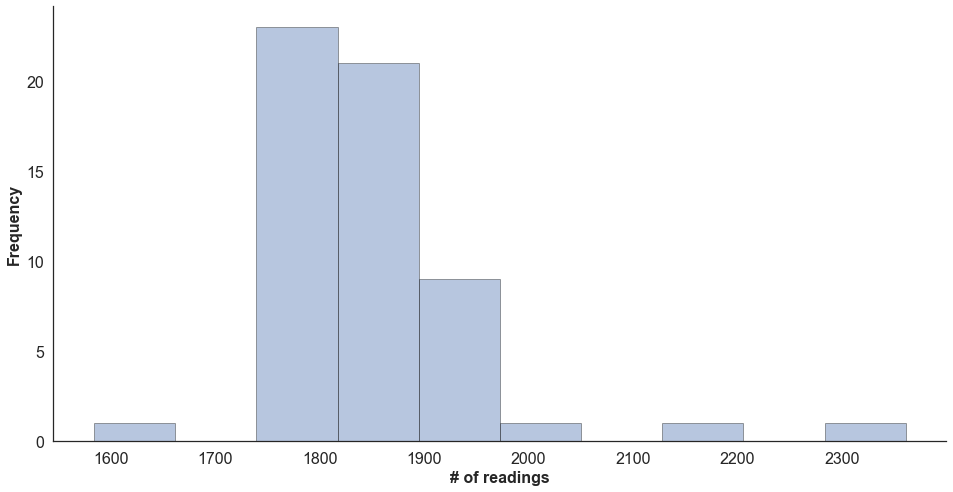

In [13]:
glucoCheckObject.columnPlots(xx['# of readings'], '# of readings')

### Calculating the variability indices
We calculate the following variability indices for all individuals:
- ADRR
- BGRI
- CONGAn
- Distance Travelled
- Estimated hbA1c
- GFI
- GLI
- GMI
- GRADE
- GVP
- IGC
- J - Index
- LAGE
- M - Value
- MAD
- MAG
- MAGE
- MODD
- PGS
- SD of ROC
- Summary Statistics
- Time in Range
- Variability Episodes



In [14]:
gvi = glucoCheckObject.gvIndices(data);

Error calculating HBGI for: 0       1636-69-111
1       1636-69-111
2       1636-69-111
3       1636-69-111
4       1636-69-111
           ...     
1594    1636-69-111
1595    1636-69-111
1596    1636-69-111
1597    1636-69-111
1598    1636-69-111
Name: subjectId, Length: 1599, dtype: object
Error calculating Mvalue for: 0       1636-69-111
1       1636-69-111
2       1636-69-111
3       1636-69-111
4       1636-69-111
           ...     
1594    1636-69-111
1595    1636-69-111
1596    1636-69-111
1597    1636-69-111
1598    1636-69-111
Name: subjectId, Length: 1599, dtype: object
Error calculating HBGI for: 0       2133-011
1       2133-011
2       2133-011
3       2133-011
4       2133-011
          ...   
1743    2133-011
1744    2133-011
1745    2133-011
1746    2133-011
1747    2133-011
Name: subjectId, Length: 1748, dtype: object
Error calculating Mvalue for: 0       2133-011
1       2133-011
2       2133-011
3       2133-011
4       2133-011
          ...   
1743    2133-011
174

In [15]:
display(gvi)

,ADDR,BGRI,LBGI,HBGI,CONGA1,CONGA2,CONGA4,DT,HBA1C,GFI,...,IQR,MAX,MIN,TAR_VH(%),TAR_H(%),TIR(%),TBR_L(%),TBR_VL(%),Hypoglycemic Episodes,Hyperglycemic Episodes
Subject ID,,,,,,,,,,,,,,,,,,,,,
1636-69-001,17.58,1.67,0.71,0.97,0.01,0.01,0.01,4319.0,5.60,4.62,...,29.00,250,64,0.000,3.305,96.624,0.070,0.000,0,0
1636-69-026,11.54,0.96,0.36,0.60,3.88,4.15,3.65,4254.0,5.65,4.89,...,25.00,182,62,0.000,0.134,99.665,0.201,0.000,0,0
1636-69-028,6.50,0.99,0.64,0.35,0.05,0.06,0.08,3625.0,5.42,4.08,...,24.00,179,75,0.000,0.000,100.000,0.000,0.000,0,0
1636-69-032,7.21,0.74,0.60,0.14,2.67,3.53,3.82,3986.0,5.36,4.03,...,19.00,156,67,0.000,0.000,99.931,0.069,0.000,0,0
1636-69-035,10.71,1.44,0.63,0.81,1.76,2.76,2.77,4667.0,5.65,5.30,...,33.00,194,69,0.000,0.414,99.379,0.207,0.000,0,0
1636-69-048,8.89,1.44,1.42,0.02,2.78,3.44,3.94,3425.0,5.00,3.37,...,16.50,136,63,0.000,0.000,99.233,0.767,0.000,0,0
1636-69-053,10.82,1.42,1.19,0.23,3.22,3.89,4.16,3683.0,5.13,3.51,...,17.00,183,66,0.000,0.114,99.543,0.342,0.000,0,0
1636-69-060,5.82,0.87,0.08,0.79,2.42,2.76,2.92,3636.0,5.94,3.47,...,20.00,181,91,0.000,0.061,99.939,0.000,0.000,0,0
1636-69-064,12.82,1.16,0.43,0.73,4.83,5.19,5.35,4789.0,5.67,5.11,...,28.75,218,78,0.000,1.363,98.637,0.000,0.000,0,0


### Creating an individual with a gap

In [16]:
# creating gaps
def createGap(df,start,end):
    l = len(df.index)
    if end>=l:
        end = l
        
    for i in range(start,end):
        df['GlucoseValue'][i]= float("NaN")
    
    return df

data2 = pd.read_csv("~/Desktop/NCSA_genomics/Python - notebooks/Data/Ohio-Data/OhioFullConsolidated.csv")
data2['Display Time'] = pd.to_datetime(data2['Display Time'])
data2['GlucoseValue'] = pd.to_numeric(data2['GlucoseValue'])
data2 = data2[data2['subjectId']=='OD552']
data2 = data2.reset_index(drop=True)

seed = 9250
start = seed
end = seed+44

dataWithMissing = data2.copy()
dataWithMissing = createGap(dataWithMissing,start,end)

### Imputing the individual with the gap

In [17]:
imputed = glucoCheckObject.impute(dataWithMissing)

Gap < 50; We use LSTM imputations
Training Model...

Model trained successfully!
Imputation Successful


### Classifying the individual as diabetic, prediabetic or non-diabetic

In [18]:
label = glucoCheckObject.classifier(imputed)
print(label)

['diabetic']
